In [66]:
import ROOT
from ROOT import TTree
from sklearn.metrics import roc_curve, auc
import numpy as np
import uproot
import awkward as ak

In [84]:
fileName = "/Users/mascella/workspace/EPR-workspace/histo.root"
treeName = "initial_counter"
event_tree = uproot.open(fileName)[treeName]
events = event_tree.arrays(namedecode='utf-8')
print(type(events))
events = ak.Table(events)
print(type(events))
print(events.size)

<class 'dict'>
<class 'awkward.array.table.Table'>
247


In [68]:
gen_match = events["lepton_gen_match"]
print(gen_match)
print(type(gen_match))

[[3 5 6 6] [6 6 5 5 6] [5 3] ... [5 5 6] [5 6 5 ... 6 6 6] [5 5]]
<class 'awkward.array.jagged.JaggedArray'>


In [69]:
def where(condition, if_true, if_false):
    return condition*if_true + (1 - condition)*if_false

In [70]:
# gen_match_flat = gen_match.flatten()
# pred_VSjet = events.arrays()[b"deepTau_VSjet"].flatten()
# pred_VSe = events.arrays()[b"deepTau_VSe"].flatten()
# pred_VSmu = events.arrays()[b"deepTau_VSmu"].flatten()
# # print(gen_match[:4])
# # print(pred_VSjet[:4])
# # print(pred_VSe[:4])
# # print(pred_VSmu[:4])
# pred_VSjet_mean = {}
# pred_VSe_mean = {}    
# pred_VSmu_mean = {}    
# for ii in range(3,7):
#     pred_VSjet_mean[ii] = np.mean(pred_VSjet[gen_match_flat == ii])
#     pred_VSe_mean[ii] = np.mean(pred_VSe[gen_match_flat == ii])    
#     pred_VSmu_mean[ii] = np.mean(pred_VSmu[gen_match_flat == ii])
# print(pred_VSjet_mean)
# print(pred_VSe_mean)
# print(pred_VSmu_mean)

In [71]:
pred_all = events["deepTau_VSjet"]
truth_all = where(gen_match==5, 1, 0)
sel_tauorjets = where(gen_match>=5, 1, 0)>0
pred = pred_all[sel_tauorjets]
truth = truth_all[sel_tauorjets]
print(gen_match)
print(sel_tauorjets)
print(pred_all)
print(truth_all)
print(pred)
print(truth)

[[3 5 6 6] [6 6 5 5 6] [5 3] ... [5 5 6] [5 6 5 ... 6 6 6] [5 5]]
[[False True True True] [True True True True True] [True False] ... [True True True] [True True True ... True True True] [True True]]
[[0.99232286 1.0001591e-05 2.4669174e-07 0.0] [0.0022637232 0.0018526925 0.015802292 1.0 1.0] [0.99998695 0.95646775] ... [0.99201125 0.010836753 0.102956764] [1.0 0.9903036 6.388735e-05 ... 1.0 0.0 0.0] [0.010929887 2.1273685e-05]]
[[0 1 0 0] [0 0 1 1 0] [1 0] ... [1 1 0] [1 0 1 ... 0 0 0] [1 1]]
[[1.0001591e-05 2.4669174e-07 0.0] [0.0022637232 0.0018526925 0.015802292 1.0 1.0] [0.99998695] ... [0.99201125 0.010836753 0.102956764] [1.0 0.9903036 6.388735e-05 ... 1.0 0.0 0.0] [0.010929887 2.1273685e-05]]
[[1 0 0] [0 0 1 1 0] [1] ... [1 1 0] [1 0 1 ... 0 0 0] [1 1]]


In [72]:
fpr, tpr, _ = roc_curve(truth.flatten(), pred.flatten())
score = auc(fpr, tpr)
score

0.5789601659157548

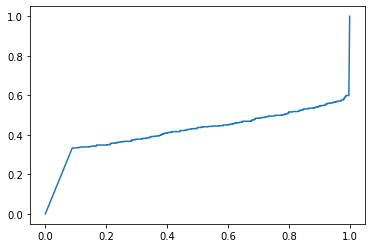

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(tpr, fpr)
#plt.hist(y_pred_taus.flatten())

395
531


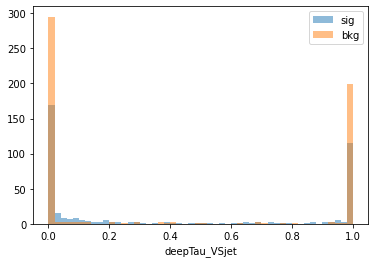

In [83]:
print(len(pred[truth==1].flatten()))
print(len(pred[truth==0].flatten()))
plt.hist(pred[truth==1].flatten(), bins=50, alpha=0.5, label="sig")
plt.hist(pred[truth==0].flatten(), bins=50, alpha=0.5, label="bkg")
plt.legend()
plt.xlabel("deepTau_VSjet")
plt.savefig("VSjet_distr.pdf")